## Churn Prediction for Bank Customers

Customer churn is a financial term that refers to the loss of a client or customer—that is, when a customer ceases to interact with a company or business. Similarly, the churn rate is the rate at which customers or clients are leaving a company within a specific period of time. A churn rate higher than a certain threshold can have both tangible and intangible effects on a company's business success. Ideally, companies like to retain as many customers as they can.

Here we will look how a bank can predict customer churn based on different customer attributes such as age, gender, geography, and more.

#### Steps
1.  Importing the libraries
2.  Loading the dataset
3.  Selecting relevant features
4.  Converting categorical columns to numeric ones
5.  Preprocessing the data
6.  Training a machine learning algorithm
7.  Evaluating the machine learning algorithm
8.  Evaluating the dataset features

In [1]:
import os
os.chdir(r'C:\Users\A3438\Downloads\Applied AI\Bank churn forecasting')

In [33]:
# 1. import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# 2. Load dataset
customer_data = pd.read_csv('Churn_Modelling.csv')
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We see that the dataset contains 14 columns (also known as features or variables). The first 13 columns are the independent variable, while the last column is the dependent variable that contains a binary value of 1 or 0. Here, 1 refers to the case where the customer left the bank after 6 months, and 0 is the case where the customer didn't leave the bank after 6 months. This is known as a binary classification problem, where you have only two possible values for the dependent variable—in this case, a customer either leaves the bank after 6 months or doesn't.

It's important to mention that the data for the independent variables was collected 6 months before the data for the dependent variable, since the task is to develop a machine learning model that can predict whether a customer will leave the bank after 6 months, depending on the current feature values.

In [23]:
# 3. Feature Selection
columns = customer_data.columns.values.tolist()
# columns = list(customer_data.columns.values)
print(columns)
print(customer_data.shape)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
(10000, 14)


### Additional information about columns

1. RowNumber—corresponds to the record (row) number and has no effect on the output. This column will be removed.
2. CustomerId—contains random values and has no effect on customer leaving the bank. This column will be removed.
3. Surname—the surname of a customer has no impact on their decision to leave the bank. This column will be removed.
4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography—a customer's location can affect their decision to leave the bank. We'll keep this column.
6. Gender—it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.
7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.
11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember—active customers are less likely to leave the bank, so we'll keep this.
13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited—whether or not the customer left the bank. This is what we have to predict.

In [12]:
#We can remove rownumber, customer id and Surname

dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# 4. Processing. Convert Categorical to Numerical

#Converting categorical to numerical is require as model will not unerstand textual data.
#Geogrpahy and Gender are textual columns. Gener can be processed with label encoding.
#But for geogrpahy we cannot have 1,2,3 as algorithm will understand it as some ordinal relationship, so we do onehot endoing.
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:] #this will drop first column.
Geography = pd.get_dummies(customer_data.Geography, drop_first=True)  #this will drop first column.
Geography.head()

Gender = pd.get_dummies(customer_data.Gender, drop_first= True)
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [19]:
# Drop columns and concat geography
dataset =  dataset.drop(['Geography', 'Gender'], axis=1) #Axis  = 1 for column drop
dataset= pd.concat([dataset, Geography, Gender], axis =1) # axis =1 for column append

In [20]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
# 5. Data preprocesing
# We first need to isolate the variable that we are predicting
X = dataset.drop(['Exited'], axis=1)
y =  dataset['Exited']

#Split the data into train test with testsize of 20% data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [25]:
# 6. Model Selection
# We will use Random forest algorthm which is simple and one of the most powerful ML algorithm.
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [28]:
# 7. Model Evaluation
# Most common measures are F1 scores, precision, recall and accuracy
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

#We have decnet accuracy and higer f1 score which is good for a basic model

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


<AxesSubplot:>

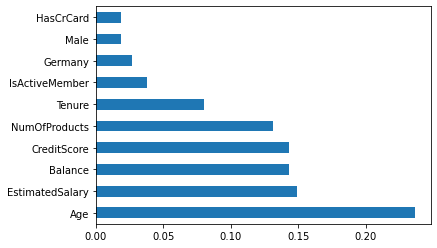

In [31]:
# 8. Evaluate Feature importance

feat_importance = pd.Series(classifier.feature_importances_, index =  X.columns)
feat_importance.nlargest(10).plot(kind = 'barh')

#Age has he highest impact, followed by Salary and Account balance